In [1]:
from mlflood.conf import PATH_GENERATED
import h5py
from pathlib import Path
import torch
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
from matplotlib.pyplot import MultipleLocator

In [2]:
h5file_val = h5py.File(PATH_GENERATED / Path("709"+"-val.h5"), "r")
keys = sorted(h5file_val.keys())
print(keys)

['dem', 'event_name', 'mask', 'rainfall_events_0', 'rainfall_events_1', 'timesteps_0', 'timesteps_1', 'waterdepth_0', 'waterdepth_1']


In [3]:
name = "val"
catchment_num = "709"
with h5py.File(PATH_GENERATED / Path(catchment_num + "-" + name+".h5"), 'r') as f:
    dem = f["dem"][()]
    mask = f["mask"][()]
    event_name = f["event_name"][()]
    timesteps = []
    waterdepth = []
    rainfall_events = []
    for k in filter(lambda x: "timesteps"==x[:9],  sorted(f.keys())):
        timesteps.append(f[k][()])
    for k in filter(lambda x: "waterdepth"==x[:10],  sorted(f.keys())):
        waterdepth.append(f[k][()])
    for k in filter(lambda x: "rainfall_events"==x[:15],  sorted(f.keys())):
        rainfall_events.append(f[k][()])

In [4]:
name = "train"
with h5py.File(PATH_GENERATED / Path(catchment_num + "-" + name+".h5"), 'r') as f:
    for k in filter(lambda x: "timesteps"==x[:9],  sorted(f.keys())):
        timesteps.append(f[k][()])
    for k in filter(lambda x: "waterdepth"==x[:10],  sorted(f.keys())):
        waterdepth.append(f[k][()])
    for k in filter(lambda x: "rainfall_events"==x[:15],  sorted(f.keys())):
        rainfall_events.append(f[k][()])

In [5]:
 name = "test"
with h5py.File(PATH_GENERATED / Path(catchment_num + "-" + name+".h5"), 'r') as f:
    for k in filter(lambda x: "timesteps"==x[:9],  sorted(f.keys())):
        timesteps.append(f[k][()])
    for k in filter(lambda x: "waterdepth"==x[:10],  sorted(f.keys())):
        waterdepth.append(f[k][()])
    for k in filter(lambda x: "rainfall_events"==x[:15],  sorted(f.keys())):
        rainfall_events.append(f[k][()])

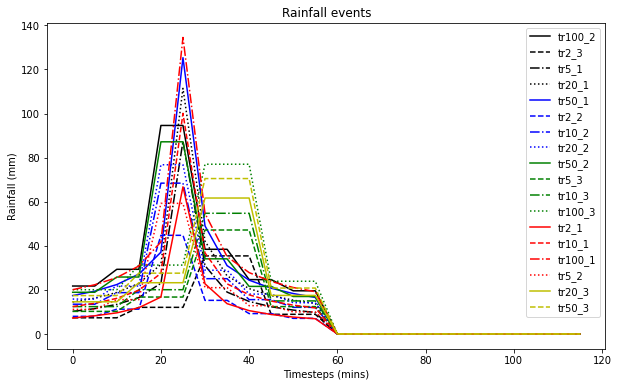

In [6]:
k = 24
labels = ['tr100_2', 'tr2_3', 'tr5_1', 'tr20_1', 'tr50_1', 'tr2_2', 
                    'tr10_2', 'tr20_2', 'tr50_2', 'tr5_3', 
                    'tr10_3', 'tr100_3', 'tr2_1', 'tr10_1', 'tr100_1', 'tr5_2','tr20_3', 'tr50_3']
i = 0
# a = np.arange(0, 120)
plt.figure(figsize=(10, 6))
# plt.xticks(a[::5])
# plt.rc('axes', prop_cycle=(cycler('color', list('rbgykcm')) * cycler('linestyle', ['-', '--', ':', '-.'])))
clrs_list=['k','b','g','r', 'y'] # list of basic colors
styl_list=['-','--','-.',':'] # list of basic linestyles
for t, re in zip(timesteps, rainfall_events):
    clrr=clrs_list[i // 4]
    styl=styl_list[i % 4]
    plt.plot(t[:k]// 60, re[:k]*10000, label = labels[i], color=clrr, ls=styl)
    i+=1

plt.title("Rainfall events")
plt.xlabel('Timesteps (mins)')
plt.ylabel('Rainfall (mm)')
plt.legend()
# save_folder = '../figs/'
# filename = save_folder + 'rainfall.png'
# plt.savefig(filename, dpi=1200, bbox_inches = 'tight')
plt.show()